In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names, na_values=["?"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
df_cleaned = df.dropna()
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [8]:
value_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}

df_cleaned['target'] = df_cleaned['target'].map(value_mapping)
df_cleaned['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [9]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [10]:
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [12]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

In [13]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

In [14]:
# y_res.value_counts()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print('shape X_train: ', X_train.shape)
print("shape X_test:", X_test.shape)
print("shape y_train:", y_train.shape)
print("shape y_test:", y_test.shape)

shape X_train:  (237, 13)
shape X_test: (60, 13)
shape y_train: (237,)
shape y_test: (60,)


In [17]:
y_test.value_counts()

target
0    31
1    29
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.39583333, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.3125    , 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4375    , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47916667, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.54166667, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, MaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [54]:
tf.keras.backend.clear_session()

#Execution time: 11797.13 seconds
#Best: 0.8232269503546099, using {'batch_size': 8, 'dropout': 0.2, 'epochs': 100, 'filters': 64, 'lstm': 128, 'units': 32}

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(2))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

er = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 2s 19ms/step - loss: 0.6866 - accuracy: 0.4979 - val_loss: 0.6679 - val_accuracy: 0.7000
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6527 - accuracy: 0.6962 - val_loss: 0.5969 - val_accuracy: 0.8000
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5509 - accuracy: 0.7384 - val_loss: 0.4914 - val_accuracy: 0.7667
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5967 - accuracy: 0.6878 - val_loss: 0.5272 - val_accuracy: 0.7500
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5395 - accuracy: 0.7384 - val_loss: 0.4715 - val_accuracy: 0.7500
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5138 - accuracy: 0.7553 - val_loss: 0.4655 - val_accuracy: 0.7667
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5060 - accuracy: 0.7511 - val_loss: 0.4505 - val_accuracy: 0.8000
Epoch 8/100


Text(0, 0.5, 'Accuracy')

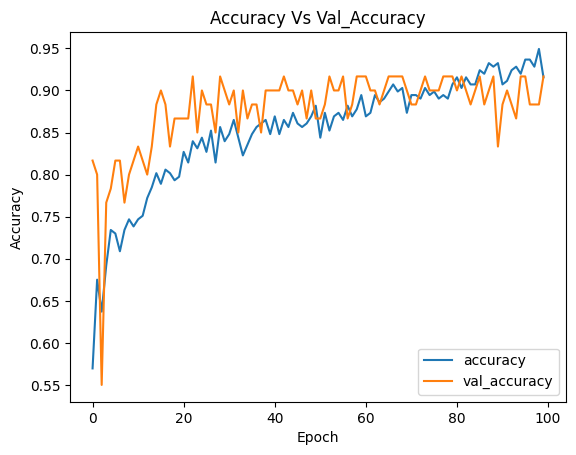

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

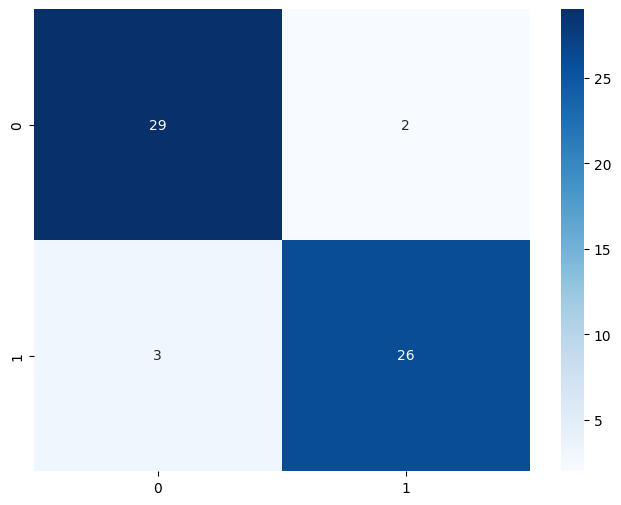

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.93      0.90      0.91        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
f = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.show()
# f.savefig('randomsearch_cm_hybrid.png')

# Membuat classification report
classification_rep = classification_report(y_test, y_pred.round())
print('Classification Report: ')
print(classification_rep)

In [25]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from scikeras.wrappers import KerasClassifier

def hybridModel(filters=64, lstm=64, units=64, dropout=0.2):
  tf.keras.backend.clear_session()
  model = tf.keras.Sequential()
  model.add(Conv1D(filters, 3, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(MaxPooling1D(2))
  model.add(LSTM(lstm))
  model.add(Dense(units, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [27]:
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'filters': [32, 64, 128],
    'lstm': [32, 64, 128],
    'units': [32, 64, 128],
    'dropout': [0.2, 0.5],
    'epochs': [50, 100],
    'batch_size': [8, 16, 32]
}

hybrid = KerasClassifier(hybridModel, filters=32, lstm=128, units=32, dropout=0.2, verbose=0)
grid = GridSearchCV(estimator=hybrid, param_grid=param_grid, scoring='accuracy', verbose=1, cv=5, return_train_score=True)

start_time = time.time()
grid_results = grid.fit(X_train, y_train)
end = time.time()
execution_time = end - start_time

print(f"Execution time: {execution_time:.2f} seconds")
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


NameError: name 'start' is not defined

In [29]:
execution_time = end - start_time

print(f"Execution time: {execution_time:.2f} seconds")
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Execution time: 11797.13 seconds
Best: 0.8232269503546099, using {'batch_size': 8, 'dropout': 0.2, 'epochs': 100, 'filters': 64, 'lstm': 128, 'units': 32}


In [30]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.7384751773049645 (0.09121474536578095) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 32}
0.726418439716312 (0.09907778573106567) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 64}
0.7510638297872341 (0.11191778124617394) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 32, 'units': 128}
0.6955673758865248 (0.11895775780268208) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 64, 'units': 32}
0.7130319148936171 (0.09195172900374049) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 64, 'units': 64}
0.6830673758865249 (0.11123608169986045) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 64, 'units': 128}
0.7302304964539006 (0.06068105373326147) with: {'batch_size': 8, 'dropout': 0.2, 'epochs': 50, 'filters': 32, 'lstm': 128, 'units': 32}
0.7305851063829787 (0.1056826832349446) with: {'batch

In [31]:
df_result = pd.DataFrame(grid_results.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_filters,param_lstm,param_units,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.624003,0.363307,0.295920,0.024862,8,0.2,50,32,32,32,...,0.738475,0.091215,173,0.767196,0.783069,0.794737,0.784211,0.742105,0.774263,0.018329
1,7.550300,0.409922,0.270157,0.009904,8,0.2,50,32,32,64,...,0.726418,0.099078,206,0.544974,0.830688,0.742105,0.763158,0.784211,0.733027,0.098501
2,7.372634,0.229376,0.273540,0.012016,8,0.2,50,32,32,128,...,0.751064,0.111918,146,0.814815,0.825397,0.784211,0.800000,0.542105,0.753305,0.106510
3,7.228603,0.165308,0.262882,0.004190,8,0.2,50,32,64,32,...,0.695567,0.118958,282,0.830688,0.777778,0.789474,0.542105,0.542105,0.696430,0.127226
4,7.502195,0.310242,0.271867,0.012550,8,0.2,50,32,64,64,...,0.713032,0.091952,246,0.862434,0.777778,0.621053,0.789474,0.778947,0.765937,0.078951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,4.625712,0.199449,0.262738,0.003729,32,0.5,100,128,64,64,...,0.759574,0.055763,121,0.846561,0.825397,0.768421,0.789474,0.668421,0.779655,0.061910
320,4.654289,0.155840,0.260365,0.003582,32,0.5,100,128,64,128,...,0.763830,0.065918,105,0.835979,0.830688,0.773684,0.778947,0.805263,0.804912,0.025609
321,4.753357,0.158586,0.263549,0.001106,32,0.5,100,128,128,32,...,0.759486,0.031776,125,0.820106,0.804233,0.757895,0.773684,0.747368,0.780657,0.027521
322,4.841549,0.178217,0.259130,0.004060,32,0.5,100,128,128,64,...,0.780585,0.034287,51,0.867725,0.756614,0.768421,0.715789,0.768421,0.775394,0.050055


In [56]:
df_result.to_csv("grid result.csv")

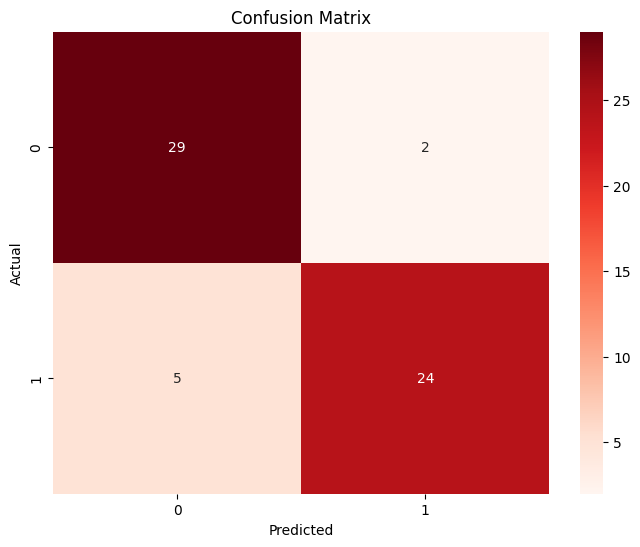

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.92      0.83      0.87        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [34]:
# Execution time: 11797.13 seconds
# Best: 0.8232269503546099, using {'batch_size': 8, 'dropout': 0.2, 'epochs': 100, 'filters': 64, 'lstm': 128, 'units': 32}
y_pred = grid.predict(X_test)

# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
classification_rep = classification_report(y_test, y_pred.round())
print('Classification Report: ')
print(classification_rep)